### Check that patches and labels for HRSID in YOLO format are correct:

In [1]:
import os
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

In [2]:
# Load a patch from train, test, and val
dataset_path = os.path.join(r"C:\Users", "alexm", "Senior-Design", "datasets", "HRSID", "yolo")
train_patch_img_path = os.path.join(dataset_path, "train", "images", "P0001_0_800_8400_9200_11_43.png") # 2 ships
train_patch_label_path = os.path.join(dataset_path, "train", "labels", "P0001_0_800_8400_9200_11_43.txt")
val_patch_img_path = os.path.join(dataset_path, "val", "images", "P0001_3600_4400_2400_3200_6_582.png") # 1 ship
val_patch_label_path = os.path.join(dataset_path, "val", "labels", "P0001_3600_4400_2400_3200_6_582.txt")
test_patch_img_path = os.path.join(dataset_path, "test", "images", "P0008_600_1400_8400_9200_7_7319.png") # 2 ships
test_patch_label_path = os.path.join(dataset_path, "test", "labels", "P0008_600_1400_8400_9200_7_7319.txt")

In [3]:
def convert_yolo_to_anchors(center_x, center_y, width, height):
    x_anchor = (center_x - width / 2) * 200
    y_anchor = (center_y - height / 2) * 200
    return x_anchor, y_anchor

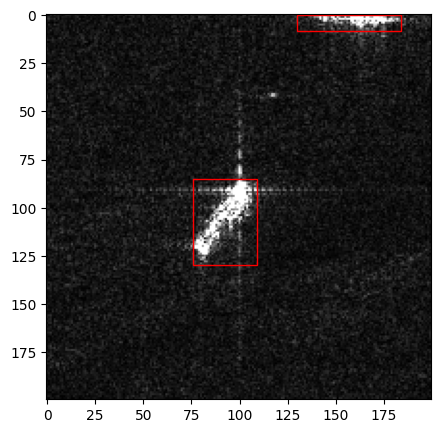

In [4]:
# Train patch
x_centers = []
y_centers = []
widths = []
heights = []
with open(train_patch_label_path, 'r') as file:
    for line in file:
        line_list = line.strip().split(' ')
        x_centers.append(float(line_list[1]))
        y_centers.append(float(line_list[2]))
        widths.append(float(line_list[3]))
        heights.append(float(line_list[4]))
with Image.open(train_patch_img_path) as img:
    fig, ax = plt.subplots(figsize=(5,5))
    ax.imshow(img)
    for ship_idx in range(len(x_centers)):
        x_anchor, y_anchor = convert_yolo_to_anchors(x_centers[ship_idx], y_centers[ship_idx], widths[ship_idx], heights[ship_idx])
        ship_rect = patches.Rectangle((x_anchor, y_anchor), widths[ship_idx]*200, heights[ship_idx]*200,
                                   linewidth=1, edgecolor='r', facecolor='none')
        ax.add_patch(ship_rect)
    plt.show()

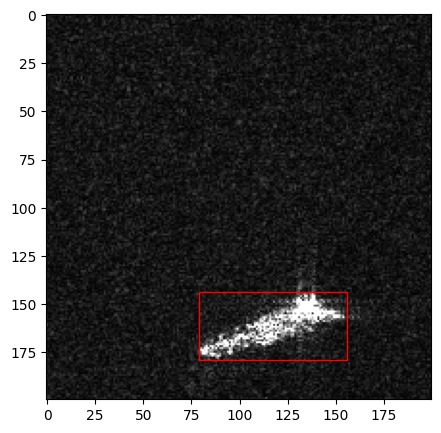

In [5]:
# Val patch
x_centers = []
y_centers = []
widths = []
heights = []
with open(val_patch_label_path, 'r') as file:
    for line in file:
        line_list = line.strip().split(' ')
        x_centers.append(float(line_list[1]))
        y_centers.append(float(line_list[2]))
        widths.append(float(line_list[3]))
        heights.append(float(line_list[4]))
with Image.open(val_patch_img_path) as img:
    fig, ax = plt.subplots(figsize=(5,5))
    ax.imshow(img)
    for ship_idx in range(len(x_centers)):
        x_anchor, y_anchor = convert_yolo_to_anchors(x_centers[ship_idx], y_centers[ship_idx], widths[ship_idx], heights[ship_idx])
        ship_rect = patches.Rectangle((x_anchor, y_anchor), widths[ship_idx]*200, heights[ship_idx]*200,
                                   linewidth=1, edgecolor='r', facecolor='none')
        ax.add_patch(ship_rect)
    plt.show()

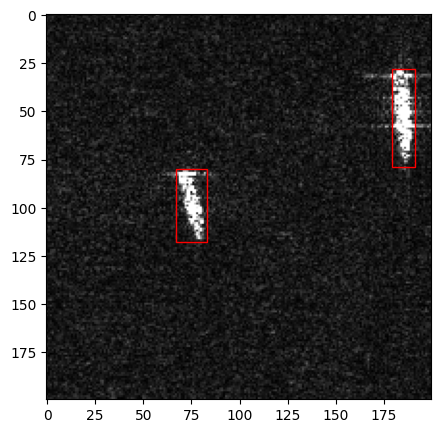

In [6]:
# Testpatch
x_centers = []
y_centers = []
widths = []
heights = []
with open(test_patch_label_path, 'r') as file:
    for line in file:
        line_list = line.strip().split(' ')
        x_centers.append(float(line_list[1]))
        y_centers.append(float(line_list[2]))
        widths.append(float(line_list[3]))
        heights.append(float(line_list[4]))
with Image.open(test_patch_img_path) as img:
    fig, ax = plt.subplots(figsize=(5,5))
    ax.imshow(img)
    for ship_idx in range(len(x_centers)):
        x_anchor, y_anchor = convert_yolo_to_anchors(x_centers[ship_idx], y_centers[ship_idx], widths[ship_idx], heights[ship_idx])
        ship_rect = patches.Rectangle((x_anchor, y_anchor), widths[ship_idx]*200, heights[ship_idx]*200,
                                   linewidth=1, edgecolor='r', facecolor='none')
        ax.add_patch(ship_rect)
    plt.show()

## Choose an image, plot each patch and all labels

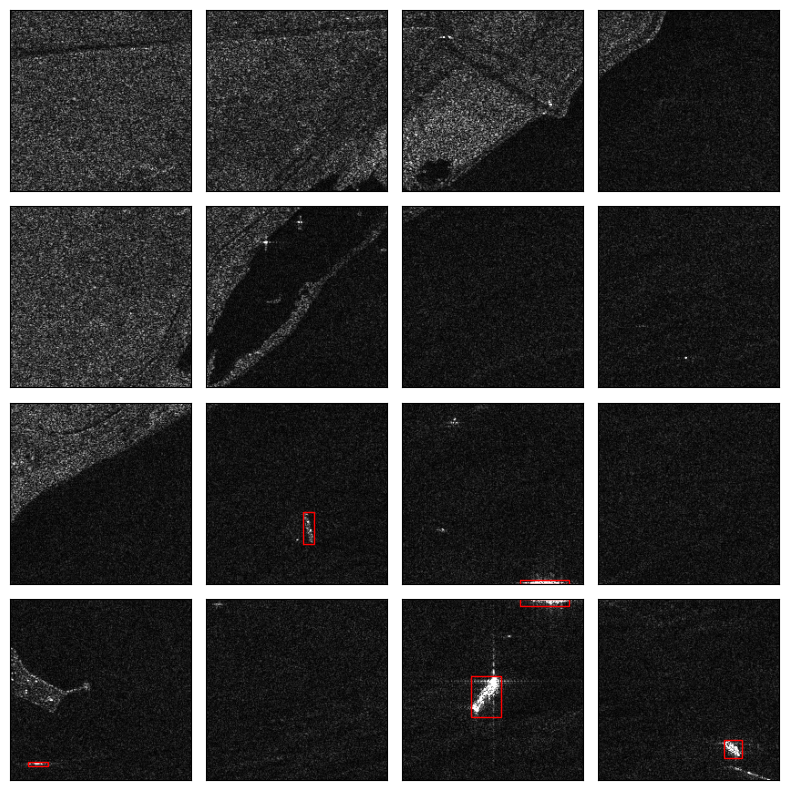

In [9]:
# Image 2
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(8,8))
row = 0
col = 0
for patch_idx in range(16):
    try:
        with Image.open(os.path.join(dataset_path, "train", "images", "P0001_0_800_8400_9200_" 
                                     + str(patch_idx) + "_" + str(patch_idx+32) + ".png")) as img:
            axs[row, col].imshow(img)
        label_path = os.path.join(dataset_path, "train", "labels", "P0001_0_800_8400_9200_" 
                                        + str(patch_idx) + "_" + str(patch_idx+32) + ".txt")
        if os.path.isfile(label_path):
            with open(label_path) as file:
                for line in file:
                    line_list = line.strip().split(' ')
                    x_anchor, y_anchor = convert_yolo_to_anchors(float(line_list[1]), float(line_list[2]), float(line_list[3]), float(line_list[4]))
                    ship_rect = patches.Rectangle((x_anchor, y_anchor), float(line_list[3])*200, float(line_list[4])*200,
                                        linewidth=1, edgecolor='r', facecolor='none')
                    axs[row, col].add_patch(ship_rect)
    except:
        try:
            with Image.open(os.path.join(dataset_path, "val", "images", "P0001_0_800_8400_9200_" 
                                     + str(patch_idx) + "_" + str(patch_idx+32) + ".png")) as img:
                axs[row, col].imshow(img)
            label_path = os.path.join(dataset_path, "val", "patches", "P0001_0_800_8400_9200_" 
                                    + str(patch_idx) + "_" + str(patch_idx+32) + ".txt")
            if os.path.isfile(label_path):
                with open(label_path) as file:
                    for line in file:
                        line_list = line.strip().split(' ')
                        x_anchor, y_anchor = convert_yolo_to_anchors(float(line_list[1]), float(line_list[2]), float(line_list[3]), float(line_list[4]))
                        ship_rect = patches.Rectangle((x_anchor, y_anchor), float(line_list[3])*200, float(line_list[4])*200,
                                        linewidth=1, edgecolor='r', facecolor='none')
                        axs[row, col].add_patch(ship_rect)
        except:
            with Image.open(os.path.join(dataset_path, "test", "images", "P0001_0_800_8400_9200_" 
                                     + str(patch_idx) + "_" + str(patch_idx+32) + ".png")) as img:
                axs[row, col].imshow(img)
            label_path = os.path.join(dataset_path, "test", "patches", "P0001_0_800_8400_9200_" 
                                    + str(patch_idx) + "_" + str(patch_idx+32) + ".txt")
            if os.path.isfile(label_path):
                with open(label_path) as file:
                    for line in file:
                        line_list = line.strip().split(' ')
                        x_anchor, y_anchor = convert_yolo_to_anchors(float(line_list[1]), float(line_list[2]), float(line_list[3]), float(line_list[4]))
                        ship_rect = patches.Rectangle((x_anchor, y_anchor), float(line_list[3])*200, float(line_list[4])*200,
                                        linewidth=1, edgecolor='r', facecolor='none')
                        axs[row, col].add_patch(ship_rect)
    axs[row, col].get_xaxis().set_visible(False)
    axs[row, col].get_yaxis().set_visible(False)
    row += 1
    if row == 4:
        row = 0
        col += 1
plt.tight_layout()